In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('C:\\Users\\DELL\\heart.csv',encoding='utf-8')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.shape

(1025, 14)

<AxesSubplot:>

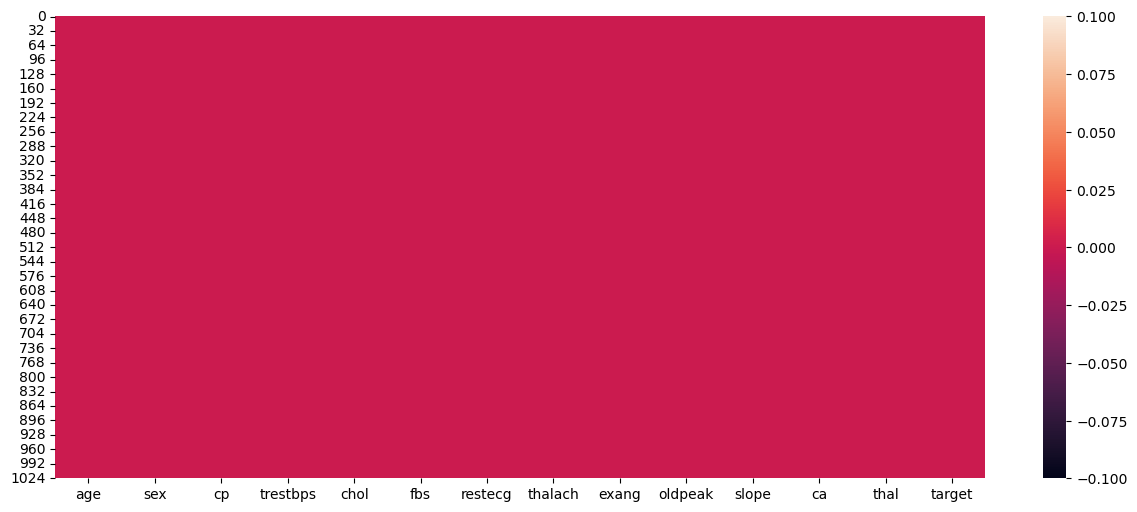

In [6]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull())
#no null values in the data set

In [7]:
#1.Number of people suffering from heart disease

In [8]:
s=0
for i in df['target']:
    if (i==1):
        s=s+1
    else:
        continue
print(s)
#526 People suffer from heart disease

526


<AxesSubplot:xlabel='target', ylabel='count'>

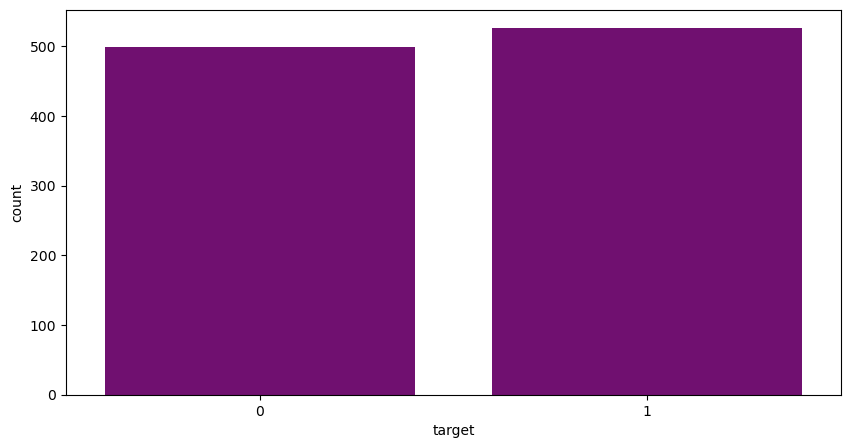

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['target'],color='purple')

In [10]:
#2.Number of male and female having heart disease

In [11]:
m=0
for i in df.index:
    if(df['sex'][i]==1 and df['target'][i]==1):
        m=m+1
    else:
        continue
print(m)
# 300 male are suffering from heart disease   

300


In [12]:
f=0
for i in df.index:
    if(df['sex'][i]==0 and df['target'][i]==1):
        f=f+1
    else:
        continue
print(f)
#226 female are suffering from heart disease

226


In [13]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [14]:
df1=df.groupby('sex')['target'].value_counts()
df1

sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: target, dtype: int64

<AxesSubplot:xlabel='sex,target'>

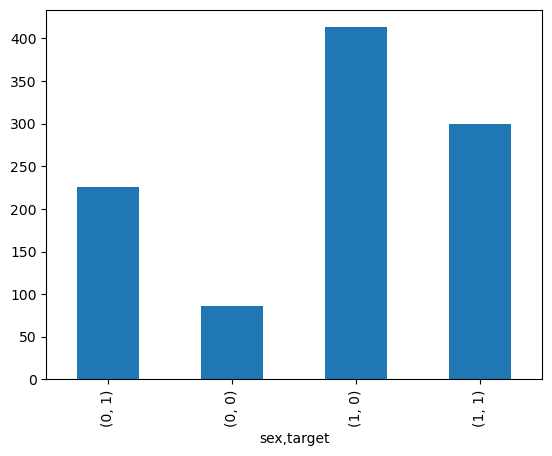

In [15]:
df1.plot.bar()

In [16]:
#3.Visualize frequency distribution of the thalach variable and find what's the heart rate and heartdisesease relation?

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalach'>

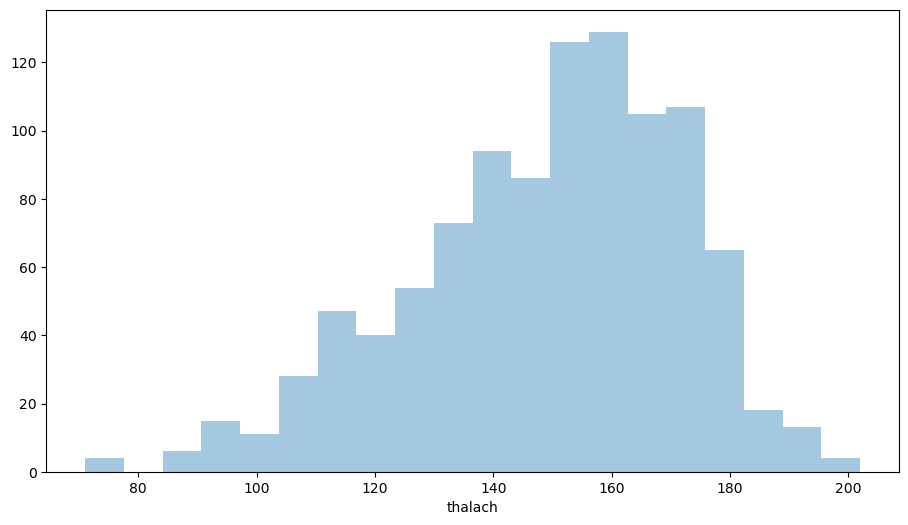

In [17]:
plt.figure(figsize=(11,6))
sns.distplot(df['thalach'],kde=False,bins=20)
#maximum have a thalach between 160-170 i.e person having heart rate 160-170 suffer from heart disease

In [18]:
#4.Find correlation matrix for all the variables with target.

In [19]:
correlation=df.corr()
print(correlation['target'].sort_values(ascending=False))

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


<AxesSubplot:>

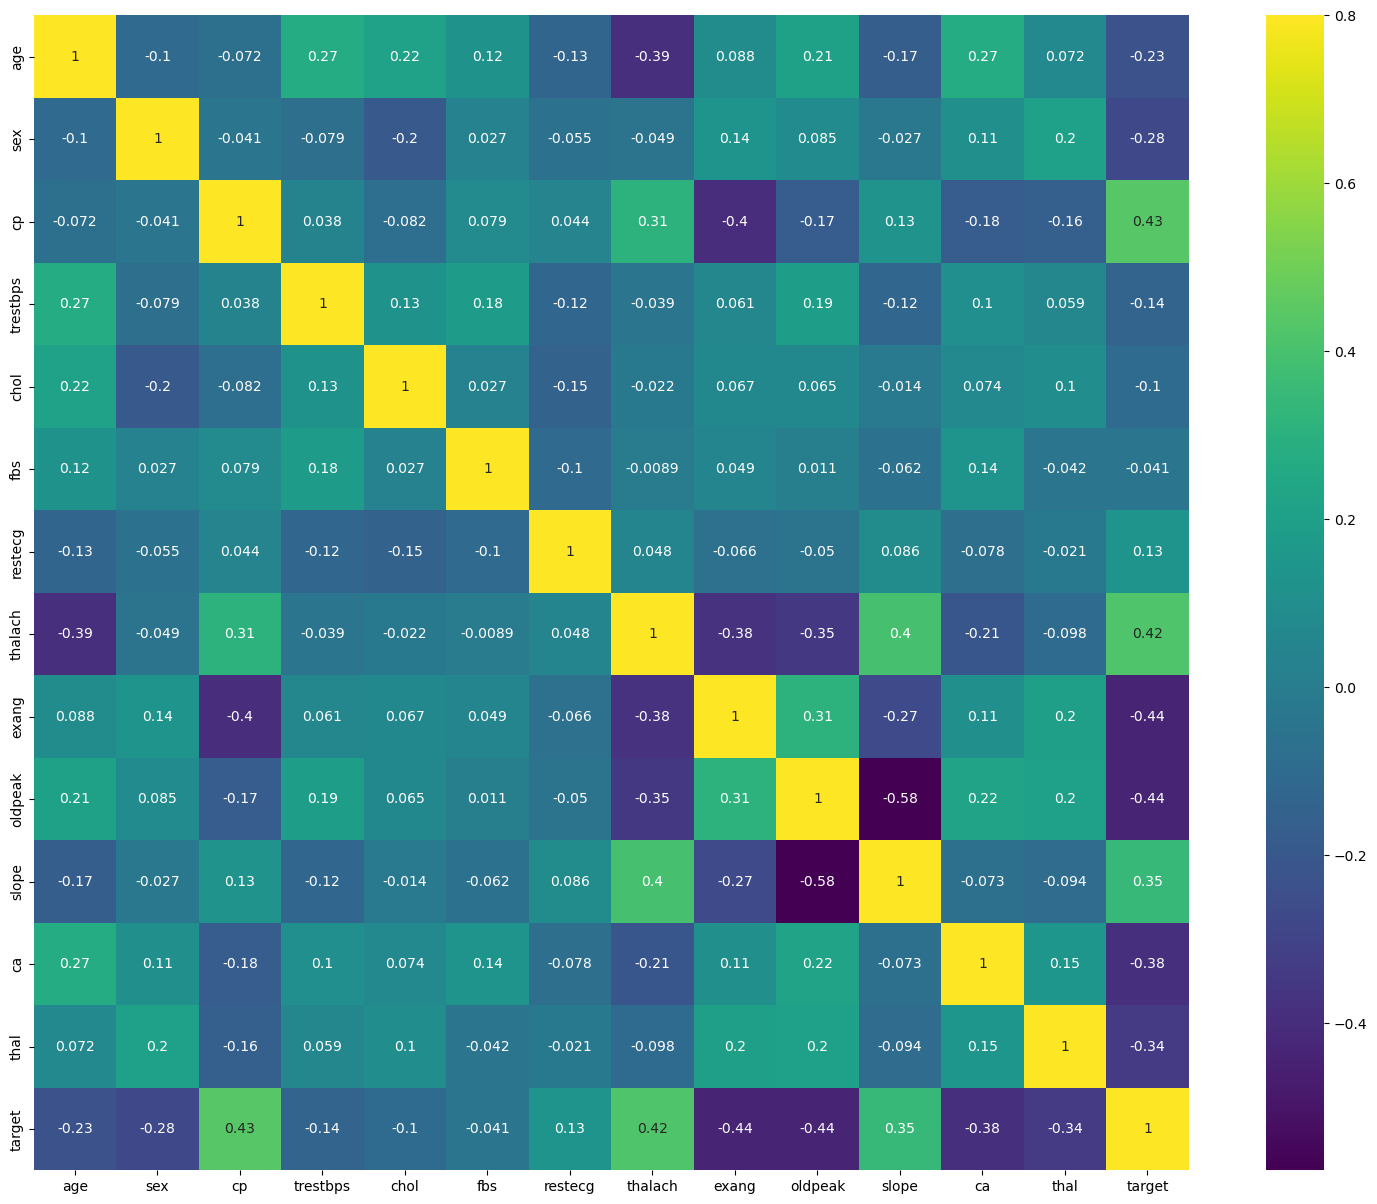

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation,annot=True,cmap='viridis',square=True,vmax=0.8)

In [21]:
#5.Find Mean,Min & Max of age and plot its distribution

In [22]:
df.groupby('target')['age'].max()

target
0    77
1    76
Name: age, dtype: int64

In [23]:
df.groupby('target')['age'].min()

target
0    35
1    29
Name: age, dtype: int64

In [24]:
df.groupby('target')['age'].mean()

target
0    56.569138
1    52.408745
Name: age, dtype: float64

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

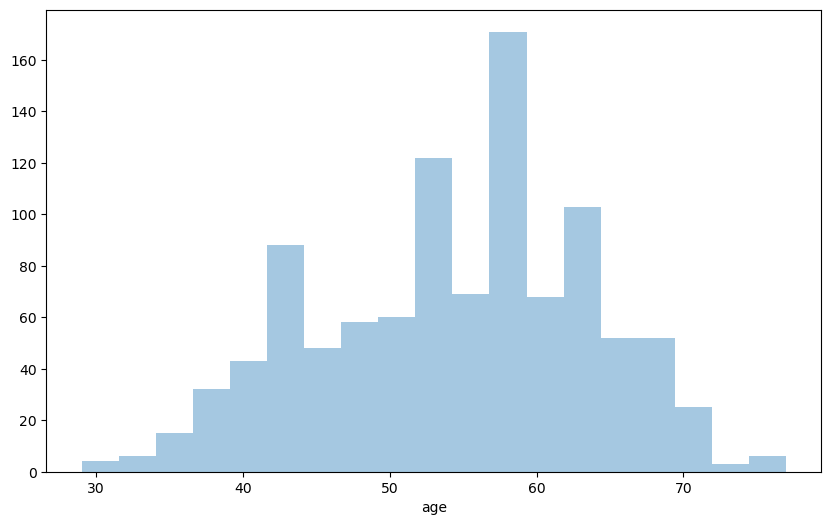

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(df['age'],kde=False)

In [26]:
#6.Age and its relation to heart disease. Are young people more prone to heart disease?

<AxesSubplot:xlabel='age', ylabel='count'>

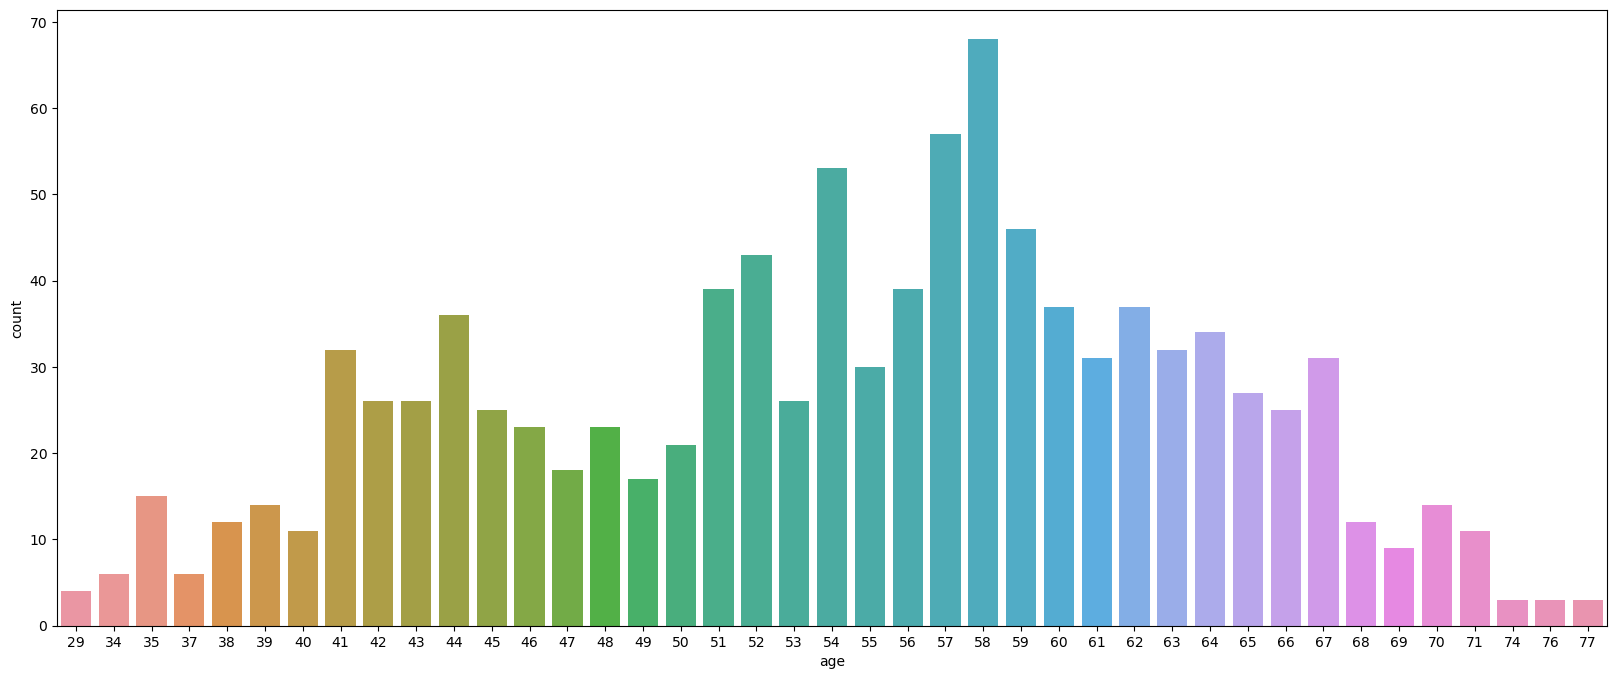

In [27]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['age'])
#age of 52 - 60 are more prone to heart disease

In [28]:
df.groupby('target')['age'].value_counts()

target  age
0       58     44
        57     36
        59     31
        61     28
        60     27
               ..
1       40      3
        61      3
        70      3
        74      3
        76      3
Name: age, Length: 75, dtype: int64

In [29]:
#7.Plot chest pain type pie chart

In [30]:
df1=df['cp'].value_counts()
df1

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

<AxesSubplot:xlabel='Chest Pain', ylabel='cp'>

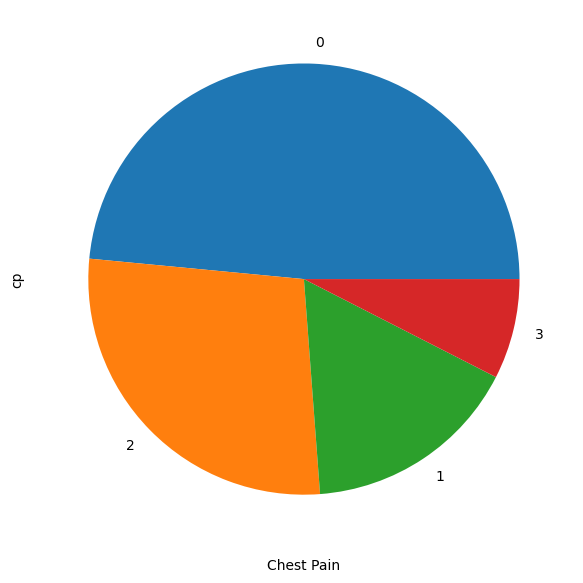

In [31]:
plt.figure(figsize=(10,7))
plt.xlabel('Chest Pain')
df1.plot.pie()

In [32]:
#8.What is the max heart rate achieved in non heart disease patients?

In [33]:
mx=0
for i in df.index:
    if (df['target'][i]==0):
        if(df['thalach'][i]>mx):
            mx=df['thalach'][i]
    else:
        continue
        
print(mx)

195


In [34]:
df.groupby('target')['thalach'].max()

target
0    195
1    202
Name: thalach, dtype: int64

In [35]:
#Heart_disease_prediction
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#import xgboost as xgb
from xgboost import XGBClassifier

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [42]:
#Checking for null values

In [43]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [44]:
#Checking for balanced dataset

In [45]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

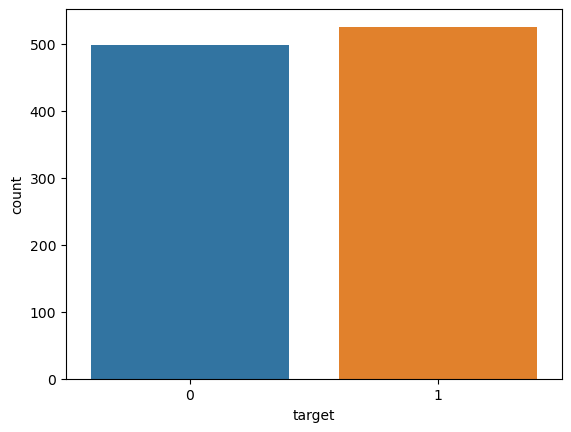

In [46]:
sns.countplot('target',data=df)

In [47]:
#Performing Feature Selection

In [48]:
#Checking Correlation

In [49]:
correlation=df.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [50]:
print(correlation['target'].sort_values(ascending=False))

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [51]:
x=df.drop('target',axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [52]:
y=df['target']
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [53]:
#Univariate Selection For categorical Variable

In [54]:
bestfeatures = SelectKBest(score_func=chi2)

In [55]:
fit = bestfeatures.fit(x,y)
scores = pd.DataFrame(fit.scores_)

In [56]:
dfcolumns = pd.DataFrame(x.columns)

In [57]:
featureScores = pd.concat([dfcolumns,scores],axis=1)
featureScores.columns = ['Label','Score'] 

In [58]:
featureScores.sort_values(by='Score',ascending=False)

,Label,Score
7,thalach,650.008493
9,oldpeak,253.653461
2,cp,217.823922
11,ca,210.625919
8,exang,130.470927
4,chol,110.723364
0,age,81.425368
3,trestbps,45.974069
10,slope,33.673948
1,sex,24.373650


In [59]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier

In [60]:
corr=ExtraTreesClassifier()

In [61]:
corr.fit(x,y)

ExtraTreesClassifier()

In [62]:
print(corr.feature_importances_)

[0.07257962 0.0570456  0.1285513  0.06242457 0.05939974 0.018791
 0.03420129 0.08710304 0.10522619 0.08866099 0.0647837  0.12015227
 0.1010807 ]


In [63]:
feature_importance=pd.Series(corr.feature_importances_,index=x.columns)
feature_importance.sort_values(ascending=False)

cp          0.128551
ca          0.120152
exang       0.105226
thal        0.101081
oldpeak     0.088661
thalach     0.087103
age         0.072580
slope       0.064784
trestbps    0.062425
chol        0.059400
sex         0.057046
restecg     0.034201
fbs         0.018791
dtype: float64

<AxesSubplot:>

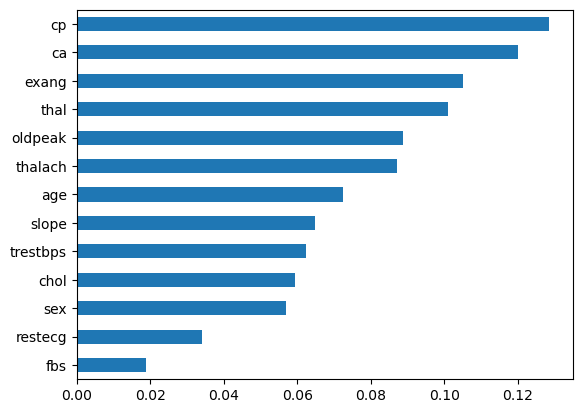

In [64]:
feature_importance.sort_values(ascending=True).plot(kind='barh')

In [65]:
#Droping the features which are not correlated

In [66]:
df.drop(['fbs','restecg'],axis=1,inplace=True)

In [67]:
df.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,168,0,1.0,2,2,3,0
1,53,1,0,140,203,155,1,3.1,0,0,3,0
2,70,1,0,145,174,125,1,2.6,0,0,3,0
3,61,1,0,148,203,161,0,0.0,2,1,3,0
4,62,0,0,138,294,106,0,1.9,1,3,2,0


In [68]:
df.shape

(1025, 12)

In [69]:
#Feature Engineering

In [70]:
for i in df.columns:
    print(i,df[i].unique())
    print('\n')

age [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]


sex [1 0]


cp [0 1 2 3]


trestbps [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]


chol [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]


thala

In [71]:
#sex,cp,restecg,exang,slope,ca,thal,target are categorical column

In [72]:
new_sex=pd.get_dummies(data=df['sex'],prefix='sex')
new_sex

,sex_0,sex_1
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
1020,0,1
1021,0,1
1022,0,1
1023,1,0


In [73]:
new_cp=pd.get_dummies(df['cp'],prefix='chestPain')
new_cp

,chestPain_0,chestPain_1,chestPain_2,chestPain_3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1020,0,1,0,0
1021,1,0,0,0
1022,1,0,0,0
1023,1,0,0,0


In [74]:
new_exang=pd.get_dummies(df['exang'],prefix='exang')
new_exang

,exang_0,exang_1
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
1020,0,1
1021,0,1
1022,0,1
1023,1,0


In [75]:
new_slope=pd.get_dummies(df['slope'],prefix='slope')
new_slope

,slope_0,slope_1,slope_2
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
1020,0,0,1
1021,0,1,0
1022,0,1,0
1023,0,0,1


In [76]:
new_thal=pd.get_dummies(df['thal'],prefix='thal')
new_thal

,thal_0,thal_1,thal_2,thal_3
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
1020,0,0,1,0
1021,0,0,0,1
1022,0,0,1,0
1023,0,0,1,0


In [77]:
new_ca=pd.get_dummies(df['ca'],prefix='ca')
new_ca

,ca_0,ca_1,ca_2,ca_3,ca_4
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
1020,1,0,0,0,0
1021,0,1,0,0,0
1022,0,1,0,0,0
1023,1,0,0,0,0


In [78]:
app=[df,new_sex,new_cp,new_ca,new_thal,new_exang,new_slope]

In [79]:
df1=pd.concat(app,axis=1)

In [80]:
df1.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,52,1,0,125,212,168,0,1.0,2,2,...,0,0,0,0,1,1,0,0,0,1
1,53,1,0,140,203,155,1,3.1,0,0,...,0,0,0,0,1,0,1,1,0,0
2,70,1,0,145,174,125,1,2.6,0,0,...,0,0,0,0,1,0,1,1,0,0
3,61,1,0,148,203,161,0,0.0,2,1,...,0,0,0,0,1,1,0,0,0,1
4,62,0,0,138,294,106,0,1.9,1,3,...,0,0,0,1,0,1,0,0,1,0


In [81]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'target', 'sex_0', 'sex_1', 'chestPain_0',
       'chestPain_1', 'chestPain_2', 'chestPain_3', 'ca_0', 'ca_1', 'ca_2',
       'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'exang_0',
       'exang_1', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [82]:
df1.drop(['sex','cp','thal','exang','ca','slope'],axis=1,inplace=True)

In [83]:
df1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,chestPain_0,chestPain_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,52,125,212,168,1.0,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,0,0,0,1,0,1,1,0,0
2,70,145,174,125,2.6,0,0,1,1,0,...,0,0,0,0,1,0,1,1,0,0
3,61,148,203,161,0.0,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0


In [84]:
df1.shape

(1025, 26)

In [85]:
#Feature Scaling

In [86]:
sc=StandardScaler()

In [87]:
df1[['age','trestbps','chol','oldpeak','thalach']]=sc.fit_transform(df1[['age','trestbps','chol','oldpeak','thalach']])

In [88]:
df1.head(10)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,chestPain_0,chestPain_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,0,0,0,1,0,1,1,0,0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,0,0,0,1,0,1,1,0,0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
5,0.393241,-1.805540,0.038784,-1.179158,-0.060888,1,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
6,0.393241,-1.005914,1.396233,-0.396362,2.834010,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
7,0.062402,1.621431,0.833861,-0.178919,-0.231177,0,0,1,1,0,...,0,0,0,0,1,0,1,0,1,0
8,-0.930114,-0.663216,0.058176,-0.222407,-0.231177,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
9,-0.047877,-0.548984,0.775685,-1.440090,1.812281,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0


In [89]:
df1.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'chestPain_0', 'chestPain_1', 'chestPain_2', 'chestPain_3',
       'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2',
       'thal_3', 'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [90]:
x=df1.drop('target',axis=1)
x

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,chestPain_0,chestPain_1,chestPain_2,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,1,1,0,0,...,0,0,0,0,1,0,1,1,0,0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,1,1,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.479107,-0.484803,0.647366,-0.912329,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
1021,0.613800,-0.377636,0.232705,-0.352873,1.471705,0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1022,-0.819834,-1.234378,0.562371,-1.353113,-0.060888,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1023,-0.488996,-1.234378,0.155137,0.429923,-0.912329,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [91]:
y=df1['target']
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [92]:
#Applying ML Algorithms

In [93]:
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=42)

In [94]:
lr=LogisticRegression(max_iter=5000)

In [95]:
print(cross_val_score(lr,x,y,cv=cv,scoring='accuracy'))

[0.81168831 0.87012987 0.89935065 0.86038961 0.86038961 0.84090909
 0.87337662 0.86038961 0.85714286 0.8474026 ]


In [96]:
print(cross_val_score(lr,x,y,cv=cv,scoring='accuracy').mean())

0.8581168831168832


In [97]:
svc=SVC()

In [98]:
print(cross_val_score(svc,x,y,cv=cv,scoring='accuracy'))

[0.87987013 0.90584416 0.93831169 0.89935065 0.92207792 0.87662338
 0.89935065 0.90909091 0.92857143 0.88636364]


In [99]:
print(cross_val_score(svc,x,y,cv=cv,scoring='accuracy').mean())

0.9045454545454547


In [100]:
dt=DecisionTreeClassifier()

In [101]:
print(cross_val_score(dt,x,y,cv=cv,scoring='accuracy'))

[0.98051948 0.97077922 0.95779221 0.98701299 0.96753247 0.98051948
 0.99025974 0.98701299 1.         0.97727273]


In [102]:
print(cross_val_score(dt,x,y,cv=cv,scoring='accuracy').mean())

0.9779220779220779


In [103]:
rf=RandomForestClassifier()

In [104]:
print(cross_val_score(rf,x,y,cv=cv,scoring='accuracy'))

[0.98051948 0.98051948 0.99025974 0.97727273 0.98701299 0.98051948
 1.         0.98701299 0.99025974 0.97727273]


In [112]:
print(cross_val_score(rf,x,y,cv=cv,scoring='accuracy').mean())

0.985064935064935


In [122]:
xgb=XGBClassifier()

In [123]:
print(cross_val_score(xgb,x,y,cv=cv,scoring='accuracy'))

[0.99025974 0.99025974 0.98051948 0.98701299 0.98701299 0.98051948
 0.99025974 0.98701299 0.99025974 0.97727273]


In [124]:
print(cross_val_score(rf,x,y,cv=cv,scoring='accuracy').mean())

0.985064935064935


In [125]:
# Logistic Regression model gives the max accuracy i.e. 99%
# Min acc=97%
# Max acc=98%